In [5]:
import os,sys,cv2
import SimpleITK as sitk
import numpy as np
import tifffile as tif
import sys
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
sys.path.append("../")

In [67]:
base = tif.imread('/home/dennislab2/Desktop/488/2023-11-20_110653_x02-y02_419-819_331-731_1070-1089.tif')

In [63]:
tst= np.load('/home/dennislab2/Desktop/488/2023-11-20_110653_x02-y02_419-819_331-731_1070-1089roisetnpy.npy')

In [64]:
tst

array([[ 17, 329, 178],
       [  6, 293,  76],
       [  2, 235, 187],
       [  2, 253, 252],
       [ 20, 252, 214],
       [ 20, 326,  98],
       [  1, 253, 196],
       [  4, 329, 107],
       [  6, 329, 107],
       [  5, 329, 191],
       [ 12, 307, 100],
       [  1, 318,  57],
       [  6, 252, 214],
       [ 10, 291, 263],
       [ 14, 269, 250],
       [ 20, 329, 197],
       [ 19, 258, 252],
       [  7, 253, 209],
       [ 20, 326, 107],
       [ 20, 275, 250],
       [ 17, 292, 102],
       [ 16, 252, 214],
       [  4, 253, 227],
       [  4, 324, 197],
       [ 15, 329, 197],
       [  1, 329, 197],
       [  4, 253, 227],
       [  6, 228, 179],
       [ 18, 326, 102],
       [ 16, 253, 209],
       [ 18, 275, 250],
       [  2, 323, 197],
       [ 17, 252, 214],
       [  6, 232, 187],
       [  1, 329, 107],
       [ 16, 326, 107],
       [  1, 329, 107],
       [  8, 326, 107],
       [ 11, 329, 197],
       [  6, 329, 107],
       [  4, 323, 197],
       [  5, 292

In [65]:
xs=[]
ys=[]
zs=[]
for val in tst:
    print(val)
    zs.append(val[0])
    xs.append(val[1])
    ys.append(val[2])

[ 17 329 178]
[  6 293  76]
[  2 235 187]
[  2 253 252]
[ 20 252 214]
[ 20 326  98]
[  1 253 196]
[  4 329 107]
[  6 329 107]
[  5 329 191]
[ 12 307 100]
[  1 318  57]
[  6 252 214]
[ 10 291 263]
[ 14 269 250]
[ 20 329 197]
[ 19 258 252]
[  7 253 209]
[ 20 326 107]
[ 20 275 250]
[ 17 292 102]
[ 16 252 214]
[  4 253 227]
[  4 324 197]
[ 15 329 197]
[  1 329 197]
[  4 253 227]
[  6 228 179]
[ 18 326 102]
[ 16 253 209]
[ 18 275 250]
[  2 323 197]
[ 17 252 214]
[  6 232 187]
[  1 329 107]
[ 16 326 107]
[  1 329 107]
[  8 326 107]
[ 11 329 197]
[  6 329 107]
[  4 323 197]
[  5 292 214]
[ 19 326 107]
[  3 329 197]
[  5 307 100]
[ 16 269 252]
[  3 224 182]
[ 20 326  98]
[  1 323 197]
[  1 292  93]
[  7 232 172]
[ 12 329 178]
[ 19 323 214]
[ 14 253 209]
[  1 313  57]
[  3 293  76]
[  1 329 197]
[ 16 275 250]
[  5 307 100]
[ 10 329 138]
[  6 248 196]
[ 11 342 290]
[  8 329 178]
[ 15 291 102]
[ 18 326 107]
[ 20 252 214]
[  6 253 227]
[  4 329 107]
[ 20 275 250]
[  4 244 191]
[ 12 326 107]
[ 20 3

(array([113.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400]),
 <BarContainer object of 8 artists>)

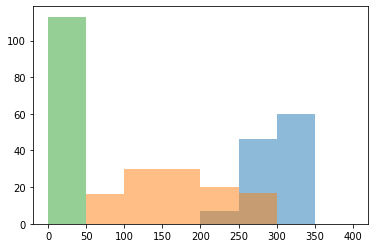

In [66]:
xs=[]
ys=[]
zs=[]
for val in tst:
    print(val)
    zs.append(val[0])
    xs.append(val[1])
    ys.append(val[2])
plt.hist(xs,alpha=0.5,bins=[0,50,100,150,200,250,300,350,400])
plt.hist(ys,alpha=0.5,bins=[0,50,100,150,200,250,300,350,400])
plt.hist(zs,alpha=0.5,bins=[0,50,100,150,200,250,300,350,400])

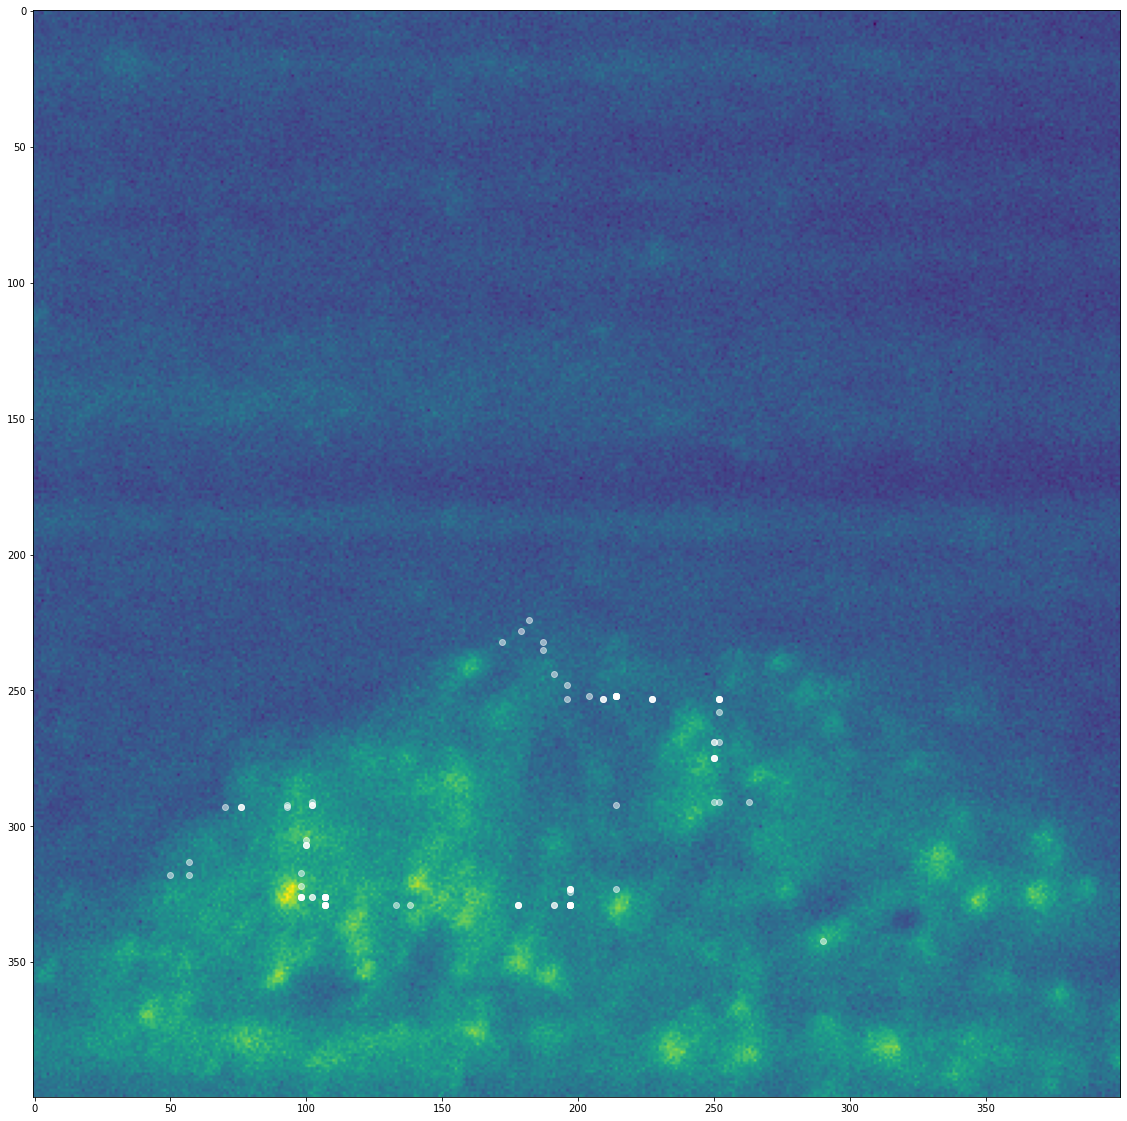

In [70]:
plt.figure(figsize=(20,20))
plt.imshow(base[10,:,:])
plt.scatter(ys,xs,alpha=0.5,c='w')

In [74]:
print(np.min(xs),np.max(xs))
print(np.min(ys),np.max(ys))
print(np.min(zs),np.max(zs))

224 342
50 290
1 20


In [17]:
mvtiff = '/home/dennislab2/Desktop/brains/mc6_sag.tif'
fxtiff = '/home/dennislab2/Desktop/brains/mc4_sag.tif'
mv= sitk.ReadImage(mvtiff,sitk.sitkFloat32)
fx = sitk.ReadImage(fxtiff,sitk.sitkFloat32)

In [40]:

def command_iteration(method):
    print("{0:3} = {1:10.5f} : {2}".format(method.GetOptimizerIteration(),
                                           method.GetMetricValue(),
                                           method.GetOptimizerPosition()))



In [85]:
from math import pi

In [19]:
registration_method = sitk.ImageRegistrationMethod()

In [20]:
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=32)

In [86]:
samplesperaxis=12

In [87]:
tx = sitk.Euler3DTransform()
registration_method.SetOptimizerAsExhaustive([samplesperaxis // 2, samplesperaxis // 2, samplesperaxis // 4, 0, 0, 0])

In [88]:
registration_method.SetOptimizerScales([2.0*pi/samplesperaxis,2*pi/samplesperaxis,2*pi/samplesperaxis,1,1,1])

In [90]:
tx = sitk.CenteredTransformInitializer(fx, mv, tx)

In [21]:
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.05) # chose randomly

In [23]:
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0,numberOfIterations=2500)

In [77]:
registration_method.SetShrinkFactorsPerLevel([64,32,16,8,4,2,1])

In [76]:
registration_method.SetSmoothingSigmasPerLevel([8,8,8,4,2,1,1]) #also guessed

In [78]:
affine = sitk.AffineTransform(3)
#sitk.CompositeTransform([initial_transform,affine])

In [79]:
registration_method.SetInitialTransform(initial_transform)
registration_method.

In [80]:
registration_method.AddCommand(sitk.sitkIterationEvent,lambda:command_iteration(registration_method))

0

In [81]:
outTx = registration_method.Execute(fx,mv)

  0 =   -0.80675 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960442722, 0.004504849390685406, 0.004974723332116549)
  0 =   -0.80675 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960442722, 0.004504849390685406, 0.004974723332116549)
  0 =   -0.80675 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960442722, 0.004504849390685406, 0.004974723332116549)
  0 =   -0.80675 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960

  0 =   -0.00000 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960442722, 0.004504849390685406, 0.004974723332116549)
  0 =   -0.00000 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960442722, 0.004504849390685406, 0.004974723332116549)
  0 =   -0.00000 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960442722, 0.004504849390685406, 0.004974723332116549)
  0 =   -0.00000 : (5.07414350686332, 0.7335140187926762, 0.4160503675896747, 2.719454924200946, 1.5108202361395626, 0.21165646441826874, 2.054724321560468, 0.9134597324776637, 1.7212147002888936, 0.005697656960

  0 =   -0.39311 : (5.224370414407081, 0.8722628883027643, 0.5796140387809926, 2.785686219532144, 1.9984942341299734, 0.5529263706079091, 1.850447868138859, 0.7206139630182324, 1.3918956632459527, 0.010276621951476776, 0.0067736670386459325, 0.00014109256238607152)
  0 =   -0.39311 : (5.224370414407081, 0.8722628883027643, 0.5796140387809926, 2.785686219532144, 1.9984942341299734, 0.5529263706079091, 1.850447868138859, 0.7206139630182324, 1.3918956632459527, 0.010276621951476776, 0.0067736670386459325, 0.00014109256238607152)
  0 =   -0.39311 : (5.224370414407081, 0.8722628883027643, 0.5796140387809926, 2.785686219532144, 1.9984942341299734, 0.5529263706079091, 1.850447868138859, 0.7206139630182324, 1.3918956632459527, 0.010276621951476776, 0.0067736670386459325, 0.00014109256238607152)
  0 =   -0.39311 : (5.224370414407081, 0.8722628883027643, 0.5796140387809926, 2.785686219532144, 1.9984942341299734, 0.5529263706079091, 1.850447868138859, 0.7206139630182324, 1.3918956632459527, 0.010

RuntimeError: Exception thrown in SimpleITK ImageRegistrationMethod_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.1/itkMattesMutualInformationImageToImageMetricv4.hxx:316:
itk::ERROR: itk::ERROR: MattesMutualInformationImageToImageMetricv4(0x564125e4ef50): All samples map outside moving image buffer. The images do not sufficiently overlap. They need to be initialized to have more overlap before this metric will work. For instance, you can align the image centers by translation.


In [ ]:

print("-------")
print(outTx)
print("Optimizer stop condition: {0}"
      .format(registration_method.GetOptimizerStopConditionDescription()))
print(" Iteration: {0}".format(registration_method.GetOptimizerIteration()))
print(" Metric value: {0}".format(registration_method.GetMetricValue()))


In [66]:
sitk.WriteTransform(outTx,'/home/dennislab2/Desktop/centered.txt')

In [67]:
resampler = sitk.ResampleImageFilter()
resampler.SetReferenceImage(fx)
resampler.SetInterpolator(sitk.sitkBSplineResamplerOrder3)
resampler.SetDefaultPixelValue(0)
resampler.SetTransform(outTx)

In [68]:
out = resampler.Execute(mv)

In [69]:
sitk.WriteImage(out, "/home/dennislab2/Desktop/testout.tif",imageIO="TIFFImageIO")